## 399 nm waist with S&k microfocuser 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

/home/qsimexpcontrol/.virtualenvs/labrad/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


sigma=  0.0155587292844


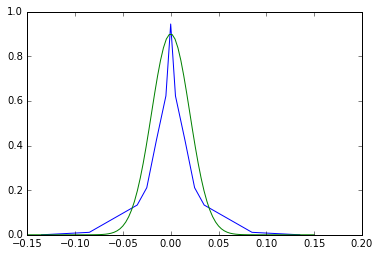

In [2]:
pos = np.array([10.9,10.85,10.8,10.79,10.78,10.77,10.765]) #micrometer position in mm
pos = -1*pos+10.765
refpos =  -1*pos[::-1]
totpos = np.concatenate((pos,refpos[1:]))
inten = np.array([170,169,158,151,132,114,85])# intensity in micro watts
inten = -1*(inten - 170)/90.0
refinten = inten[::-1]
totinten = np.concatenate((inten,refinten[1:]))

def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, totpos, totinten,p0=[1,0,1])

xdata = np.linspace(-0.15,0.15,100)
#popt returns the best fit values for parameters of the given model (func)
ym = func(xdata, popt[0], popt[1], popt[2])
ycust = func(xdata, .9, 0, 0.02)
print 'sigma= ',popt[2]
plt.plot(totpos,totinten)
plt.plot(xdata,ycust)